In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil


os.environ["KAGGLE_CONFIG_DIR"] = "/content/drive/MyDrive/kaggle_dataset"
!kaggle datasets download -d alxmamaev/flowers-recognition
with zipfile.ZipFile("/content/flowers-recognition.zip", 'r') as zip_ref:
    zip_ref.extractall("/tmp/flowers")


train_dir = "/tmp/flowers/flowers"
flower_classes = os.listdir(train_dir)


class1 = "daisy"
class2 = "dandelion"


binary_dir = "/tmp/binary_flowers"
os.makedirs(os.path.join(binary_dir, class1), exist_ok=True)
os.makedirs(os.path.join(binary_dir, class2), exist_ok=True)


for flower_class in [class1, class2]:
    source_dir = os.path.join(train_dir, flower_class)
    dest_dir = os.path.join(binary_dir, flower_class)
    for filename in os.listdir(source_dir):
        shutil.copy(os.path.join(source_dir, filename), os.path.join(dest_dir, filename))


batch_size = 32
img_height = 180
img_width = 180

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    binary_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

val_generator = train_datagen.flow_from_directory(
    binary_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')

# Build the model
num_classes = 1
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)



Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
 97% 218M/225M [00:02<00:00, 140MB/s]
100% 225M/225M [00:02<00:00, 115MB/s]
Found 1454 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Epoch 1/10
46/46 [==============================] - 62s 1s/step - loss: 0.6729 - accuracy: 0.5853 - val_loss: 0.5563 - val_accuracy: 0.7127
Epoch 2/10
46/46 [==============================] - 49s 1s/step - loss: 0.5532 - accuracy: 0.7235 - val_loss: 0.4581 - val_accuracy: 0.7873
Epoch 3/10
46/46 [==============================] - 50s 1s/step - loss: 0.4413 - accuracy: 0.7971 - val_loss: 0.4249 - val_accuracy: 0.8094
Epoch 4/10
46/46 [==============================] - 50s 1s/step - loss: 0.3460 - accuracy: 0.8501 - val_loss: 0.3868 - val_accuracy: 0.8398
Epoch 5/10
46/46 [==============================] - 49s 1s/step - loss: 0.2615 - accuracy: 0.8941 - val_loss: 0.3784 - val_accuracy: 0.8315
Epoch 6/10
46/46 [============================

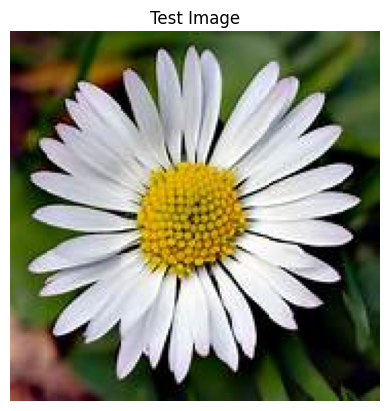

1/1 [==============================] - 0s 221ms/step
Predicted class: Daisy


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load and preprocess the test image
test_image_path = "/content/Daisy.jpg"
test_image = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(img_height, img_width))
test_image_array = tf.keras.preprocessing.image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

# Display the test image
plt.imshow(tf.keras.preprocessing.image.array_to_img(test_image_array[0]))
plt.title("Test Image")
plt.axis('off')
plt.show()

# Predict the class of the test image
prediction = model.predict(test_image_array)
predicted_class = "Dandelion" if prediction > 0.5 else "Daisy"
print("Predicted class:", predicted_class)
